# Background/Project Motivation

While exoplanets are a relatively new subfield within astronomy, the launch of dedicated planet-hunter Kelper Observatory in 2009 led to thousands of exoplanet detections, which forever shifted the field into the realm of statistics.

Exoplanet statistics involves the large-scale study of properties of planets outside our Solar System to understand their formation, evolution, and potential habitability. This field combines data from astrophysical observations with statistical methods to infer trends and insights about planetary populations.

Key areas of study include:
- *Occurrence rates*: How common are exoplanets of various types?
- *Planet demographics*: What trends exist in terms of size, mass, or orbital characteristics?
- *Comparative planetology*: How do exoplanets compare to planets in our Solar System?

**Our project will focus on Occurence Rates of exoplanets between 1-4 Earth Radii within a more long-term project of creating an Integrated Demographics model that combines the data of multilpe observational methods/Surveys**

In [159]:
# Import packages / read in data 

import numpy as np
import pandas as pd

import emcee
import corner
from scipy.stats import chi2

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


In [161]:
completeness = np.load('k1_avg_completeness.npz')['arr_0']
planets = pd.read_csv('kepler_planets.csv')
stars = pd.read_csv('kepler_stars.csv')

In [163]:
pd.set_option('display.max_columns', None)
planets

,sID,pID,per,E_per,e_per,rad,E_rad,e_rad,axis,E_axis,e_axis,koi_disposition,koi_pdisposition,reliability,comp,avg_comp,mdwarf_comp,new_comp
0,11446443,K00001.01,2.470613,2.700000e-08,-2.700000e-08,14.205767,0.295357,-0.305035,0.035500,0.000846,-0.000820,CONFIRMED,CANDIDATE,0.990100,0.132221,0.127757,0.071969,0.131793
1,10666592,K00002.01,2.204735,4.300000e-08,-4.300000e-08,16.426692,0.344201,-0.318598,0.038071,0.000532,-0.000598,CONFIRMED,CANDIDATE,0.999996,0.212862,0.135924,0.076585,0.212705
2,10748390,K00003.01,4.887803,4.660000e-07,-4.660000e-07,4.880921,0.071863,-0.067430,0.051537,0.000586,-0.000361,CONFIRMED,CANDIDATE,1.000000,0.057097,0.081539,0.046465,0.056974
3,3861595,K00004.01,3.849372,2.344000e-06,-2.344000e-06,13.031439,0.480991,-0.654302,0.058220,0.000735,-0.001551,CANDIDATE,CANDIDATE,0.972000,0.216298,0.095297,0.053178,0.215693
4,6922244,K00010.01,3.522498,1.980000e-07,-1.980000e-07,15.550352,0.374159,-0.367439,0.048948,0.000731,-0.000734,CONFIRMED,CANDIDATE,0.999370,0.129775,0.100724,0.056121,0.129465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,5098334,K08253.01,400.114820,4.988000e-02,-4.988000e-02,1.184652,0.763099,-0.429006,1.081402,0.018444,-0.022666,CANDIDATE,CANDIDATE,0.429690,0.000018,0.000057,0.000141,0.000018
3234,6356506,K08263.01,280.555440,2.526000e-02,-2.526000e-02,2.925837,0.308007,-0.216383,0.878522,0.017395,-0.022250,CANDIDATE,CANDIDATE,0.706153,0.002120,0.003300,0.001445,0.002077
3235,8329346,K08275.01,389.875816,7.194000e-03,-7.194000e-03,4.000653,0.294414,-0.446863,0.995887,0.018873,-0.021460,CANDIDATE,CANDIDATE,0.083320,0.001591,0.002205,0.000815,0.001573
3236,8637903,K08276.01,385.858683,5.261000e-03,-5.261000e-03,3.411429,0.147077,-0.475903,1.125974,0.010048,-0.013198,CANDIDATE,CANDIDATE,0.349682,0.002082,0.002070,0.000827,0.002061


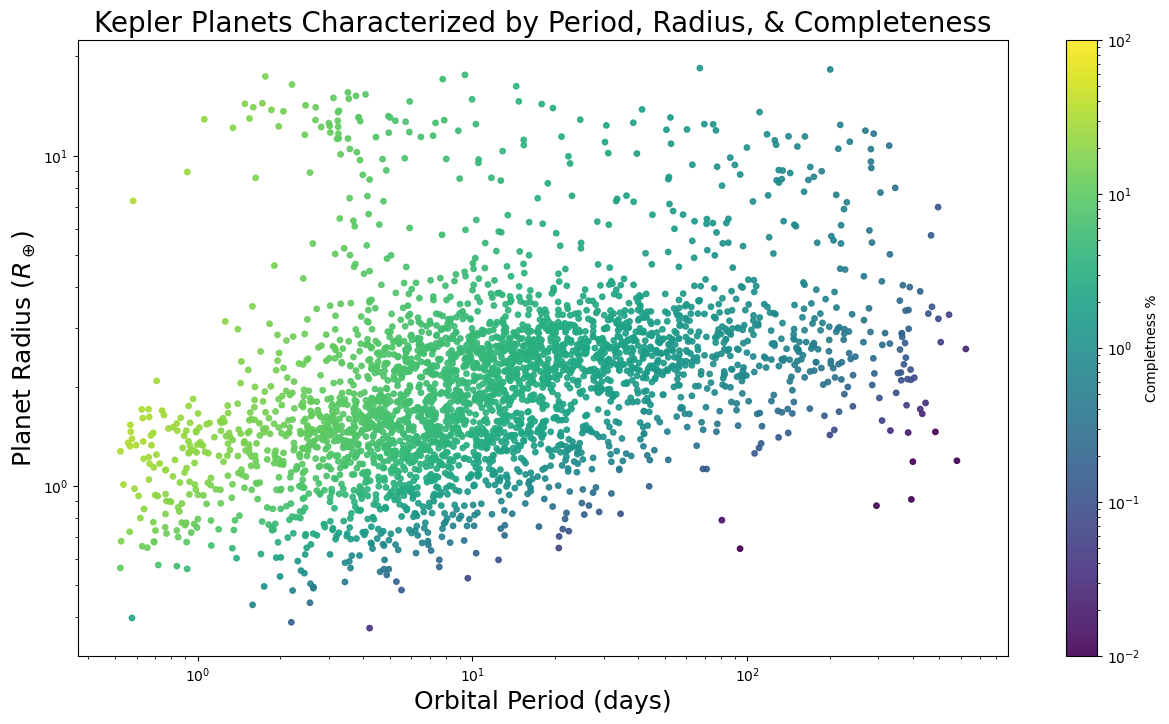

In [167]:
# defining necessary columns
P = planets['per']  # Orbital period in days
R_planet = planets['rad']  # Planet radius in Earth radii
R_star = stars['Rst']  # Stellar radius for each planet's host star, in solar radii
a = planets['axis']  # Semi-major axis for each planet, in AU
avg_comp = planets['avg_comp']  # avg_comp
avg_comp_percentage = avg_comp*100

# stellar radius from solar radii to meters
R_sun = 6.9634e8  # Radius of the Sun in meters
R_star_meters = R_star * R_sun  # Convert R_star to meters

# Convert semi-major axis from AU to meters
AU_to_meters = 1.496e11  # 1 AU in meters
a_meters = a * AU_to_meters

# Create the plot
plt.figure(figsize=(15, 8))
scatter = plt.scatter(P, R_planet, c=avg_comp_percentage, cmap='viridis', s = 15, alpha = 0.9, norm=LogNorm())
plt.clim(0.01,100)
plt.colorbar(scatter, label='Completness %')
plt.xlabel('Orbital Period (days)', fontsize = 18)
plt.ylabel('Planet Radius ($R_\\oplus$)', fontsize = 18)
plt.title('Kepler Exoplanets Characterized by Period, Radius, & Completeness', fontsize = 20)
#plt.ylim(0.5,12)
plt.xscale("log")
plt.yscale("log")

plt.show()



**Kepler Planets Characterized by Orbital Period, Planet Radius, and Completeness**

This scatter plot visualizes exoplanets detected by the Kepler mission, where the x-axis represents the orbital period (in days) and the y-axis represents the planet radius (in Earth radii, \( R_\oplus \)). The color bar indicates the detection completeness percentage, shown on a logarithmic scale, with brighter colors (yellow) representing higher completeness and darker colors (purple) representing lower completeness. 

The data highlights the distribution of detected exoplanets and the relationship between their radii and orbital periods, and from this, we can begin to group exoplanets into different categories: 


- **Hot Jupiters**: Large gas giants $R_\oplus$ $\geq$ 10 with short orbital periods P $\leq$ 10 days), located in the upper-left region of the plot.
- **Warm Jupiters** Gas giants with periods farther away than hot jupiters, P $\geq$ 20 days, located to the upper right region of the plot 
- **Sub-Neptunes**: Too large to be rocky planets but smaller than Neptune, with radii between 2 $R_\oplus$ and 4 $R_\oplus$, commonly found across a wide range of orbital periods.
- **Super-Earths** or **Hot Earths**: Planets slightly larger than Earth 1- 2 $R_\oplus$ with shorter orbital periods, often in the lower-left region of the plot.

While the long-term goal is to find the occurence rates of both giant and rocky planets to eventually determine 
$$
P(\text{Earth} \mid \text{Jupiter})
$$
Fitting for a single data set such as Kepler with larger radii range is difficut (hence the importance of integrated demographics). As a proof of concept, we will use 1-4 $R_\oplus$ to calculate occurence rates of the planets, as detailed in the next section:

# Inverse Detection Efficiency Method: Occurrence Rate Function

The occurrence rate (η) can be calculated as

$$
\eta = \frac{1}{N_{\text{stars}}} \sum_{i=1}^{N_{\text{planets}}} \frac{R_i}{C_i}
$$

Where:
- $N_{\text{stars}}$ is the total number of stars in the sample.
- $N_{\text{planets}}$ is the number of planets detected.
- $R_i$ is the reliability of the $i$-th planet (out of 1).
- $C_i$ is the completeness of the $i$-th planet (detection probability from injection recovery fraction and gemoetric probability grids).

In the cell below, we convert this equation into code:


In [290]:
# Inverse Detection Efficiency Method Occurrence function
def IDEM(criteria, output=True):
    eta, n_pl, n_st = 0,0,len(stars)
    
    this_planets = planets.query("%f < axis < %f and %f < rad < %f" %(criteria['x_range'][0], criteria['x_range'][1], criteria['y_range'][0], criteria['y_range'][1]))

    if np.any(this_planets['avg_comp']==0):
        drop = this_planets.query('avg_comp'+'==0')
        print('Dropping {} this_planets with zero completeness, IDs: '.format(len(drop)), drop.pID.values)
        this_planets = this_planets.drop(index=drop.index)
    comp = this_planets['avg_comp']
        
    if criteria['use_rel']:
        eta = np.sum(this_planets['reliability']/comp)             
    else:
        eta = np.sum(1/comp)
    n_pl = len(this_planets)
    eta *= 1/n_st
    err = eta/np.sqrt(n_pl) if n_pl>0 else np.nan
    if output:
        return 100*eta, 100*err
    else:
        print('n_pl = {:.0f}, n_st = {:.0f}'.format(n_pl,n_st))
        print('{:.2f} +/- {:.2f} %'.format(100*eta, 100*err))


In [292]:

# Semi-major axis bins (logarithmic)
a_bins = np.logspace(-2, 0, 12)  # 10 bins = 11 edges
radius_range = [1, 4]  # Fixed radius range (Measured in Earth Radii)

# Initialize lists for plotting
semi_major_axes = []
occurrence_rates = []
errors = []

# Loop through each bin
for i in range(len(a_bins) - 1):
    # Semi-major axis bin
    a_min = a_bins[i]
    a_max = a_bins[i + 1]
    a_geom_mean = np.sqrt(a_min * a_max)  # Geometric mean for x-axis point
    
    # Define criteria for IDEM
    criteria = {'x_range': [a_min, a_max], 'y_range': radius_range, 'use_rel': True}
    
    # Calculate occurrence rate using IDEM
    eta, err = IDEM(criteria)
    
    # Store results
    semi_major_axes.append(a_geom_mean)
    occurrence_rates.append(eta)
    errors.append(err)


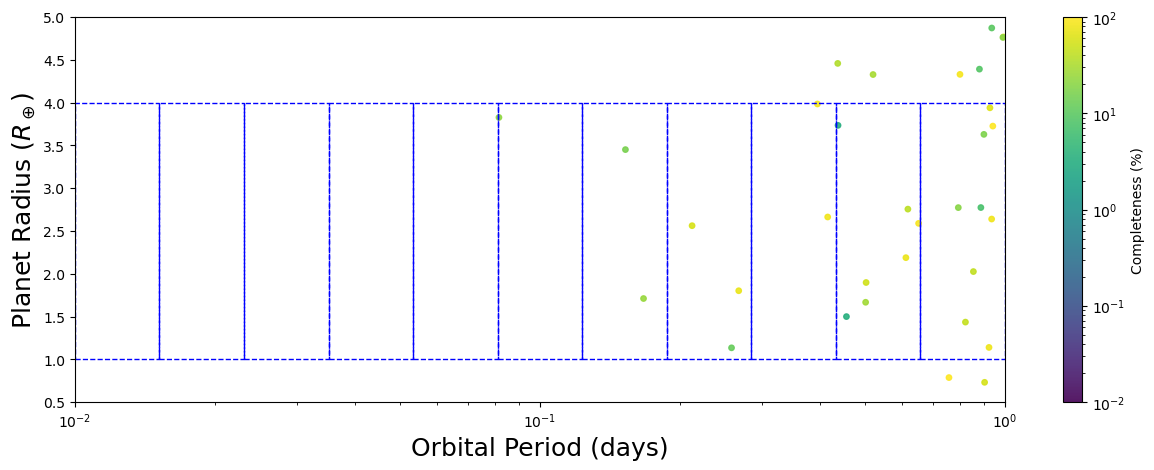

In [338]:
#Below is a 'visualization' of where the Occurence Rates come from within the "boxes" we have drawn for them.
#The result can be found in the *Plotting Initial Occurence Rate Results* section

# Earlier plot
plt.figure(figsize=(15, 5))

# Scatter plot
scatter = plt.scatter(P, R_planet, c=avg_comp_percentage, cmap='viridis', s=15, alpha=0.9, norm=LogNorm())
plt.clim(0.01, 100)
plt.colorbar(scatter, label='Completeness (%)')
plt.xlabel('Orbital Period (days)', fontsize=18)
plt.ylabel('Planet Radius ($R_\\oplus$)', fontsize=18)
plt.xlim(1e-2,1)
plt.ylim(0.5, 5)
plt.xscale("log")

# Add rectangles based on a_bins and radius_range
for i in range(len(a_bins) - 1):
    x_start = a_bins[i]
    x_end = a_bins[i + 1]
    width = x_end - x_start
    height = radius_range[1] - radius_range[0]
    y_start = radius_range[0]

    # Draw the rectangle
    rect = plt.Rectangle((x_start, y_start), width, height, fill=False, edgecolor="blue", linestyle="--")
    plt.gca().add_patch(rect)

# Show the plot
plt.show()


## Plotting Initial Occurence Rate Results

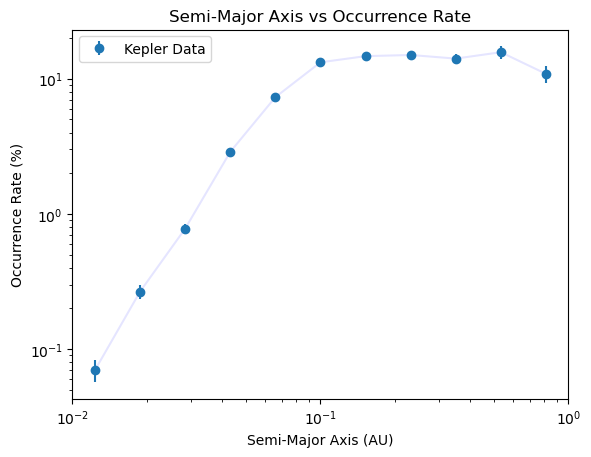

In [324]:
plt.errorbar(semi_major_axes, occurrence_rates, yerr=errors, fmt='o', label='Kepler Data')
plt.plot(semi_major_axes, occurrence_rates, color = "blue", alpha = 0.1 )

plt.xscale('log')  # Log scale for semi-major axis
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Occurrence Rate (%)')
plt.title('Semi-Major Axis vs Occurrence Rate')
#plt.xlim(1e-2,1e2)
#plt.ylim(1e-3,10)
plt.legend()
plt.show()

## Parameter "Estimations" for Priors

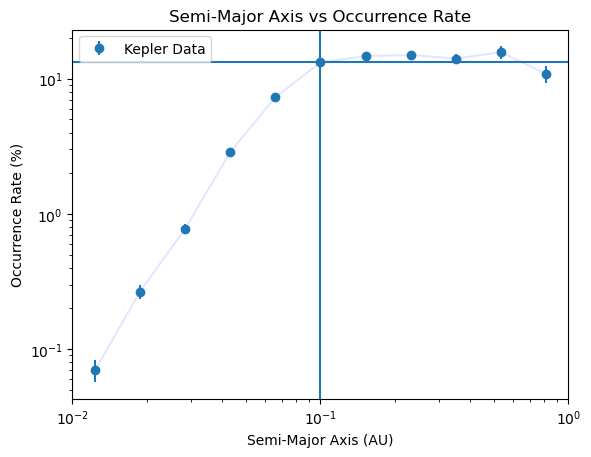

In [258]:
plt.errorbar(semi_major_axes, occurrence_rates, yerr=errors, fmt='o', label='Kepler Data')
plt.plot(semi_major_axes, occurrence_rates, color = "blue", alpha = 0.1 )


plt.xscale('log')  # Log scale for semi-major axis
plt.yscale('log')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Occurrence Rate (%)')
plt.title('Semi-Major Axis vs Occurrence Rate')

plt.axvline(0.1)
plt.axhline(occurrence_rates[5])

plt.legend()
plt.show()

In [439]:
x=np.array(semi_major_axes)
x_values=np.array(semi_major_axes)
y_obs =np.array(occurrence_rates)
y_values =np.array(occurrence_rates)
yerr=np.array(errors)

In [65]:
F0_guess = occurrence_rates[5] #Estimate based on data
x_break_guess = 0.1  #Estimate based on data


if not (min(x_values) < x_break < max(x_values)):
    raise ValueError("x_break must be within the range of x_values")

# Split the data into two regions
x_region1 = x_values[x_values < x_break_guess]
y_region1 = y_values[x_values < x_break_guess]

x_region2 = x_values[x_values >= x_break_guess]
y_region2 = y_values[x_values >= x_break_guess]

# Check for empty regions
if len(x_region1) == 0 or len(x_region2) == 0:
    raise ValueError("One of the regions has no data points. Adjust x_break_guess.")

# Log-transform the data
log_x_region1 = np.log(x_region1)
log_y_region1 = np.log(y_region1)

log_x_region2 = np.log(x_region2)
log_y_region2 = np.log(y_region2)

# Calculate the slopes (n1 and n2)
n1 = np.polyfit(log_x_region1, log_y_region1, 1)[0]  # Slope for region 1
n2 = np.polyfit(log_x_region2, log_y_region2, 1)[0]  # Slope for region 2

print(f"Estimated slopes:")
print(f"n1 (x < x_break_guess): {n1:.2f}")
print(f"n2 (x >= x_break_guess): {n2:.2f}")


Estimated slopes:
n1 (x < x_break): 2.79
n2 (x >= x_break): -0.06


# Markov Chain Monte Carlo (MCMC)

In this section, we initialize and run a Markov Chain Monte Carlo (MCMC) simulation using the `emcee` library. The goal is to sample from the posterior distribution of the parameters in the model, allowing for a probabilistic understanding of the parameter values. Here's a detailed breakdown of the steps:

1. **Functions & Initial Guess for Parameters:**
   - The `initial_guess` array provides starting values for the parameters $F_0$, $alpha_1$, $alpha_2$, and $x_{\text{break}}$ that we roughly estimated in the last sections.
   - We code up the log-likelihood, log prior, and log posterior functions.

 
4. **Number of Dimensions (`ndim`) and Walkers (`nwalkers`):**
   - `ndim` is the number of parameters being estimated, equal to the length of `initial_guess`.
   - `nwalkers` specifies the number of walkers (independent chains) in the MCMC simulation. Using multiple walkers helps the algorithm explore the parameter space more effectively.

5. **Initializing the Walkers:**
   - Each walker starts with a small random perturbation around the initial guess to ensure diversity in starting positions.
   - This is done by adding Gaussian noise (`np.random.randn`) to the initial guess.

6. **Running the Sampler:**
   - The `emcee.EnsembleSampler` object is initialized with:
     - `nwalkers` (number of walkers),
     - `ndim` (number of parameters),
     - `log_posterior` (the posterior function to sample from),
     - and `args` (additional arguments passed to `log_posterior`).
   - The `run_mcmc` method performs the sampling over 5000 steps per walker, with a progress bar enabled for tracking.

5. **Analyzing the Samples:**
   - After sampling, the `get_chain` method retrieves the samples. Setting `flat=True` combines all walker chains into a single array, making the data easier to analyze.

This process is critical for inferring the posterior distributions of the model parameters, accounting for uncertainty in the observations and errors.


As we have seen above, the data can best be fit with a broken power law. 
$$
y(x) = 
\begin{cases} 
F_0 \cdot x^{\alpha_1}, & \text{if } x < x_{\text{break}} \\
F_0 \cdot x_{\text{break}}^{\alpha_1 - \alpha_2} \cdot x^{\alpha_2}, & \text{if } x \geq x_{\text{break}}
\end{cases}
$$

**Where:**

- $y(x)$: The output of the broken power law function at input $x$.
- $F_0$: The normalization constant.
- $\alpha_1$: The power-law index before the break ($x < x_{\text{break}}$).
- $\alpha_2$: The power-law index after the break ($x \geq x_{\text{break}}$).
- $x_{\text{break}}$: The break point where the power-law behavior changes.
- $x$: The independent variable (e.g., energy, time, or wavelength).


In [91]:
def broken_power_law(x, theta):
    F0, alpha1, alpha2, x_break = theta
    y = np.zeros_like(x)
    y = F0 * (x/x_break)**np.where(x<x_break, alpha1, alpha2)
    return y

$$
\ln \mathcal{L} = -\frac{1}{2} \sum \left[ \frac{(y_{\text{obs}} - y_{\text{model}})^2}{\sigma^2} + \ln(2\pi\sigma^2) \right]
$$


In [93]:
def log_likelihood(theta, x, y_obs, yerr):
    y_model = broken_power_law(x, theta)
    sigma2 = yerr**2
    return -0.5 * np.sum((y_obs - y_model)**2 / sigma2 + np.log(2 * np.pi * sigma2))

#Gives a single value representing the log-likelihood, which quantifies how well the model fits the observed data.

In [256]:
def log_prior(theta):
    F0, alpha1, alpha2, x_break = theta
    if (F0_guess-10) < F0 < (F0_guess+10) and (n1-10) < alpha1 < (n1+10) and (n2-10) < alpha2 < (n2+10) and 0 < x_break < 0.5:
        return 0.0  # Flat prior (log probability = 0)
    return -np.inf  # Log probability of -inf for invalid values

#This function defines the **prior probability** for the parameters in a Bayesian framework. 
#The prior encodes our knowledge or assumptions about the parameter values before analyzing the data.


In [97]:
def log_posterior(theta, x, y_obs, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y_obs, yerr)

#This function calculates the **log-posterior probability** for the model parameters.
#The posterior combines the prior and likelihood, representing the probability of the parameters given the data.


In [111]:
# Initial guess for parameters
initial_guess = [F0_guess, n1, n2, 0.1]  # F0, alpha1, alpha2, x_break
ndim = len(initial_guess)
nwalkers = 50  # Number of walkers

# Initialize walkers around the initial guess
pos = initial_guess + 0.1 * np.random.randn(nwalkers, ndim)

# Run the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y_obs, yerr))
sampler.run_mcmc(pos, 5000, progress=True)

# Analyze the samples
samples = sampler.get_chain(flat=True)


  0%|                                                  | 0/5000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.12/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|█████████████████████████████████████| 5000/5000 [00:02<00:00, 1685.37it/s]


The following cell helps check for convergence (i.e., when the walkers settle into a consistent range).
They also reveal whether the parameter space has been sufficiently explored.
While F0 seems to have a bit more variation, the convergence looks reasonable enough for the next step.


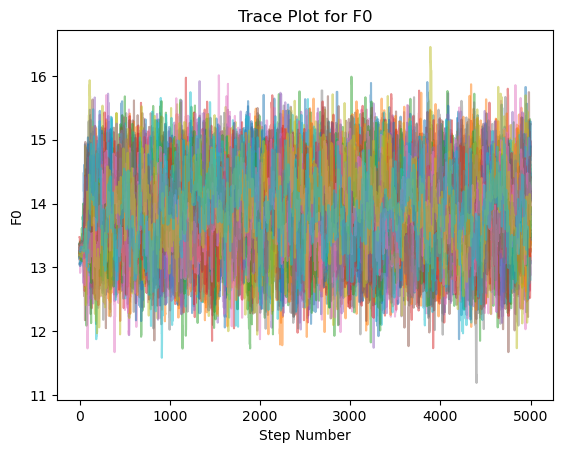

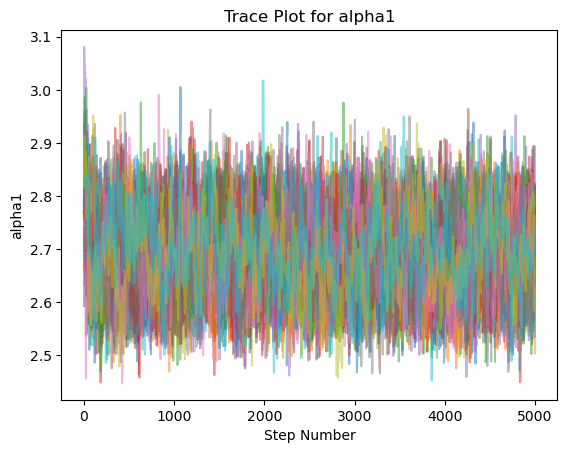

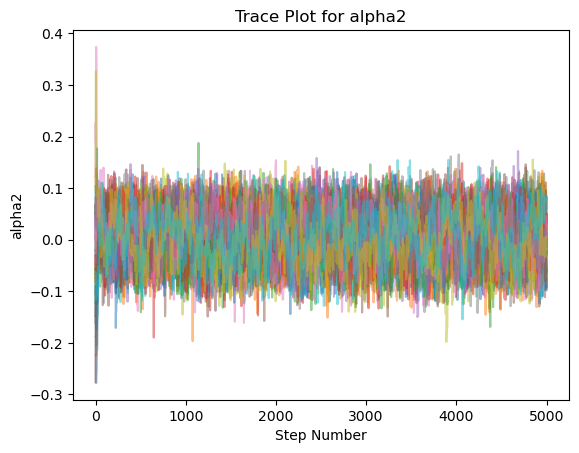

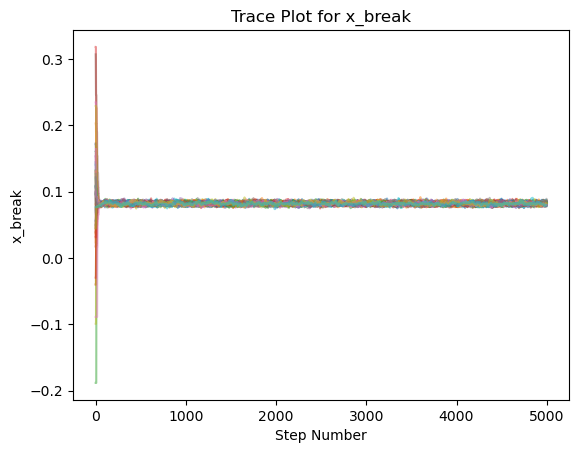

In [112]:
#Trace Plots
samples = sampler.get_chain()

# Plot each parameter's trace
labels = ["F0", "alpha1", "alpha2", "x_break"]
for i in range(samples.shape[2]):
    plt.figure()
    for walker in samples[:, :, i].T:
        plt.plot(walker, alpha=0.5)
    plt.xlabel("Step Number")
    plt.ylabel(labels[i])
    plt.title(f"Trace Plot for {labels[i]}")
    plt.show()


In [244]:
#Burn-in:
#The `burnin` variable specifies the number of initial steps to discard for each walker.
#This is necessary because the early steps (burn-in phase) might not reflect the stationary posterior distribution.

burnin = 1000  # Adjust based on trace plots
flat_samples = sampler.get_chain(discard=burnin, thin=15, flat=True)  # Flatten chain

print("Remaining Samples = ", str(flat_samples.shape[0]))

#The shape of `flat_samples` is printed to confirm how many samples remain for posterior analysis.
#This provides a sense of how much data is available for parameter estimation.




Remaining Samples =  13300


In the next section, we generate a **corner plot**, which visualizes the posterior distributions and parameter correlations:
   - `corner.corner` takes the flattened samples (`flat_samples`) and creates:
     - 1D histograms for each parameter's posterior distribution along the diagonal.
     - 2D scatter plots for pairwise correlations between parameters off-diagonal.
       
   - The corner plot provides a comprehensive view of the posterior distributions and highlights relationships between parameters.
   - It is an essential diagnostic tool for interpreting the results of the MCMC simulation. We see reasonable-looking results and even gaussian distributions for all three parameters with small margins of error.



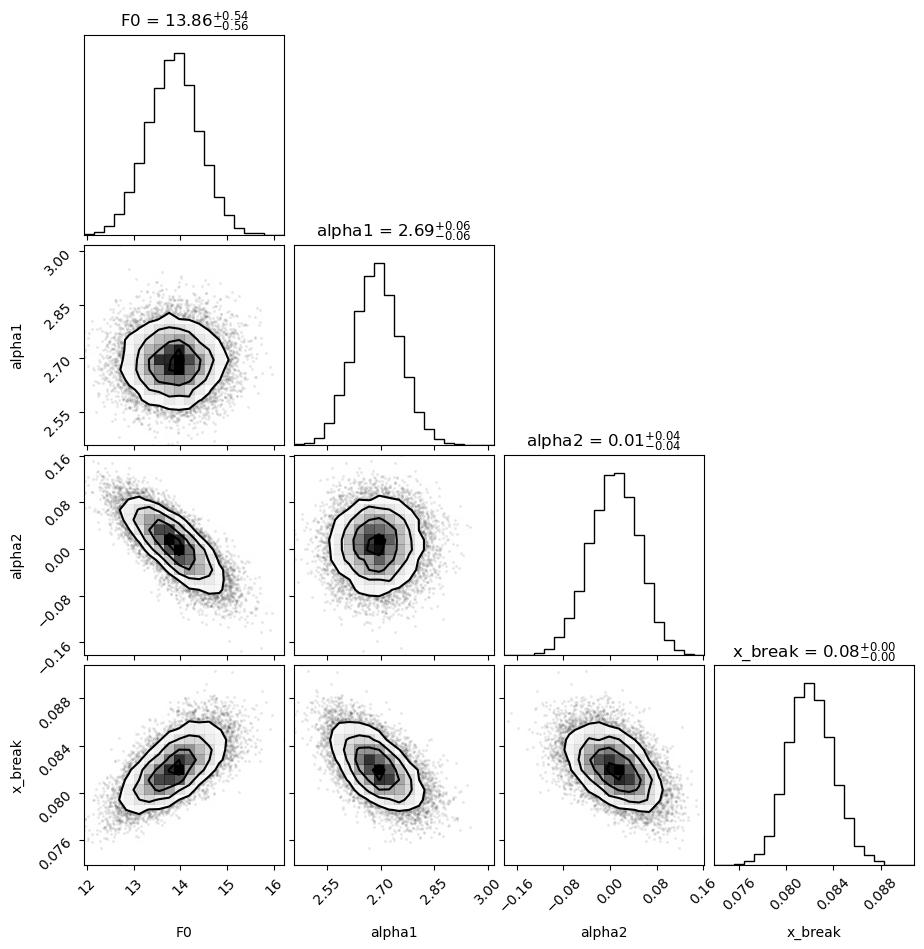

In [425]:
fig = corner.corner(flat_samples, labels=labels, truths=None, show_titles=True)
plt.show()


In [443]:
#This section provides a quantitative summary of the inferred parameter values and their uncertainties, along with the corresponding model outputs for the broken power law. The results are essential for interpreting the fit quality and visualizing the confidence intervals of the model predictions.

# Extract percentiles for each parameter, 1sigma either side.

percentiles = np.percentile(flat_samples, [16, 50, 84], axis=0)  # Shape: (3, 4)
param_16, param_median, param_84 = percentiles[0], percentiles[1], percentiles[2]
y_param_16 = broken_power_law(x_fit, param_16)
y_param_84 = broken_power_law(x_fit, param_84)

#print("16th Percentiles:", param_16)
#print("Median (50th Percentiles):", param_median)
#print("84th Percentiles:", param_84)

for i, label in enumerate(labels):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    print(f"{label}: {mcmc[1]:.3f} (16th: {mcmc[0]:.3f}, 84th: {mcmc[2]:.3f})")


F0: 13.859 (16th: 13.301, 84th: 14.402)
alpha1: 2.689 (16th: 2.626, 84th: 2.754)
alpha2: 0.008 (16th: -0.035, 84th: 0.049)
x_break: 0.082 (16th: 0.080, 84th: 0.084)


# Final MCMC Fit of Occurence Rate Data

This code visualizes the final results of the MCMC analysis by plotting the best-fit model and confidence intervals at 16 and 84 % over the observed data. Key steps include:

1. **Best-Fit Parameters:**
   - The **median values** of the posterior distributions are computed for each parameter using `np.median()`. These represent the best estimates for the model parameters.

2. **Model Predictions:**
   - The broken power law is evaluated using the best-fit parameters over a fine grid of `x` values (`x_fit`) to produce a smooth curve for the model prediction (`y_fit`).

3. **Data Visualization:**
   - The observed data (`x`, `y_obs`) and their uncertainties (`yerr`) are plotted using `plt.errorbar()` for clear comparison with the model.
   - A **red curve** represents the best-fit model prediction.
   - A **shaded region** is added to display the 1-sigma confidence interval (computed earlier as `y_param_16` and `y_param_84`), providing a visual representation of the model's uncertainty.

4. **Log-Scale Axes:**
   - Both axes are set to logarithmic scales to capture the wide dynamic range of the data (e.g., semimajor axis and occurrence rate).

5. **Labels and Legend:**
   - Axis labels describe the parameters being analyzed:
     - **Semimajor Axis** (x-axis): The distance of the exoplanet from its host star.
     - **Occurrence Rate (%)** (y-axis): The frequency of planets occurring at a given semimajor axis.
   - A legend identifies the observed data, best-fit model, and confidence interval.


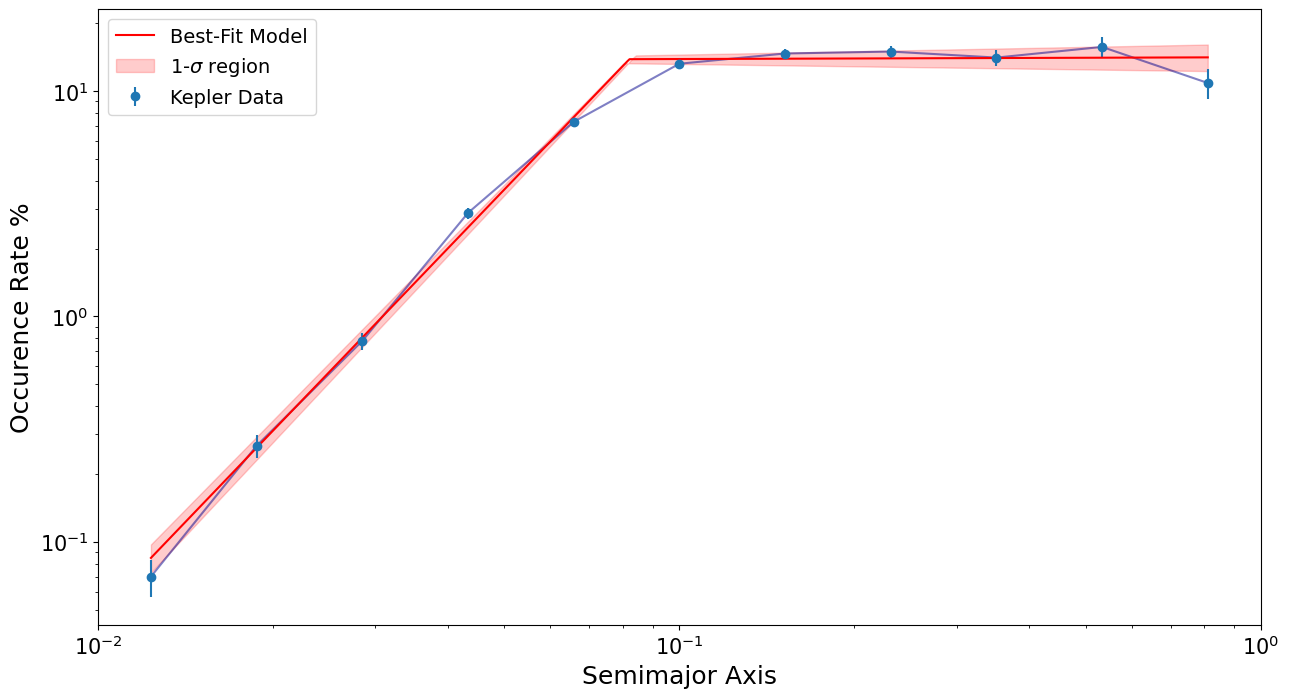

In [479]:
# Best-fit parameters (median values)
best_params = np.median(flat_samples, axis=0)

# Generate model predictions
x_fit = np.logspace(np.log10(min(x)), np.log10(max(x)), 500)  # Fine grid for plotting
y_fit = broken_power_law(x_fit, best_params)

# Plot data and model
plt.figure(figsize=(15, 8))
plt.errorbar(semi_major_axes, y_obs, yerr=yerr, fmt="o", label="Kepler Data")
plt.plot(semi_major_axes, y_obs, color = "darkblue", alpha=0.5)
plt.plot(x_fit, y_fit, label="Best-Fit Model", color="red")


# Percentile confidence intervals
plt.fill_between(x_fit, y_param_16, y_param_84, color="red", alpha=0.2, label="1-$\\sigma$ region")

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)


plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semimajor Axis",fontsize=18)
plt.ylabel("Occurence Rate %", fontsize=18)

plt.legend(fontsize=14)
plt.show()


This plot combines the observed data and the inferred model, highlighting the best-fit curve and the associated uncertainty. It demonstrates the success of the MCMC analysis in capturing the relationship between semimajor axis and occurrence rates, validating the broken power-law model's applicability.


## Extras

In [483]:
def chaisqrd_funct(y_obs,y_fit_sample):
    chi_squared = np.sum(((y_obs - y_fit_sample)**2 / y_fit_sample))
    return chi_squared

In [485]:
target = semi_major_axes
margin = 1e-3

# Find indices where x is within the range [target - margin, target + margin]
indices = []
for i in range(len(semi_major_axes)):
    for j in range(len(x_fit)):
        if (semi_major_axes[i]-margin) <= x_fit[j] <= (semi_major_axes[i]+margin):
            indices.append(j)
            break
y_fit_sample = []
for i in range(len(indices)):
    y_fit_sample.append(y_fit[indices[i]])

In [487]:
#chai squared:
chaisqrd = chaisqrd_funct(y_obs,y_fit_sample)

print(f"ChiSquared: {chaisqrd}")

# Degrees of freedom
dof = len(y_obs) - 4  # Adjust based on parameters

# Calculate the p-value
p_value = 1 - chi2.cdf(sumchaisqrd, df=dof)

print(f"P-value: {p_value}")


ChiSquared: 1.2213215883935031
P-value: 0.9904276582085217


In [489]:
reduced_chisqrd = sumchaisqrd / dof
print(f"Reduced Chi^2: {reduced_chisqrd}")

Reduced Chi^2: 0.1744745126276433


1. **Chi-squared Value:**
- The Chi-squared value $\chi^2$ is approximately **1.22**.
- This value reflects the goodness-of-fit between the observed data (`y_obs`) and the model predictions (`y_fit_sample`).
- A smaller Chi-squared value generally suggests a better fit. Since \( \chi^2 \) is close to the expected value for the degrees of freedom, it indicates the model fits the data reasonably well.

---

2. **P-value:**
- The p-value is approximately **0.99**, which is...very high.
- However, a p-value this large may suggest that the uncertainties in the data (\( y_{\text{err}} \)) could be overestimated, leading to a more forgiving evaluation of the fit. This tracks considering the data/uncertainties are quite large with this set, particularly for larger semimajor axis.

---

3. **Reduced Chi-squared Value:**
- A reduced Chi-squared value much less than 1 suggests one of the following:
  - The model is overfitting the data.
  - The uncertainties in the data (\( y_{\text{err}} \)) are likely overestimated.

---

4. **Key Conclusions:**
- **Model Fit:** The low Chi-squared value and high p-value indicate that the model fits the data extremely well. However, this could be due to overestimated uncertainties or an overfitting model.
- **Uncertainty Analysis:** The reduced Chi-squared value of **0.17** suggests that the uncertainties in the observed data may be too large, which fits with what we know of the kepler data and current struggles to fine-tune occurence rates with single surveys.
- **Next Steps** Now that we have found both the Occurence Rate and how to use MCMC to fit the data, the next step will be to move on to K2 as an additional survey to add to the larger the joint-likelyhood integrated demographics occurence rate.